In [182]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, precision_score, recall_score, f1_score

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder


import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

sns.set_context('talk')
sns.set_style("darkgrid")

<h4 style="font-size: 18px;font-family:Times New Roman">Load the dataset and perform data preprocessing</h4>

In [183]:
#Load the dataset from the csv file.
df = pd.read_csv("Churn.csv")
display(df.sample(5))

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,...,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,State,Area_Code,Phone
2570,64,43,118.4,144.1,158.1,8.5,1,no,no,yes,...,20.13,108,12.25,91,7.11,6,2.30,IA,415,374-1836
1175,134,32,216.8,102.2,174.0,8.6,0,no,no,yes,...,36.86,111,8.69,83,7.83,2,2.32,IA,415,373-7037
1875,99,0,145.6,230.9,181.5,11.4,1,no,no,no,...,24.75,87,19.63,86,8.17,7,3.08,NY,415,386-4581
493,129,33,119.6,278.7,263.4,5.9,2,no,no,yes,...,20.33,88,23.69,175,11.85,2,1.59,RI,415,366-7360
293,96,37,172.7,120.1,216.1,10.3,5,yes,no,yes,...,29.36,116,10.21,86,9.72,5,2.78,CT,415,387-5860


In [184]:
df.info()
print("Shape of the dataset = ",df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Account_Length  3333 non-null   int64  
 1   Vmail_Message   3333 non-null   int64  
 2   Day_Mins        3333 non-null   float64
 3   Eve_Mins        3333 non-null   float64
 4   Night_Mins      3333 non-null   float64
 5   Intl_Mins       3333 non-null   float64
 6   CustServ_Calls  3333 non-null   int64  
 7   Churn           3333 non-null   object 
 8   Intl_Plan       3333 non-null   object 
 9   Vmail_Plan      3333 non-null   object 
 10  Day_Calls       3333 non-null   int64  
 11  Day_Charge      3333 non-null   float64
 12  Eve_Calls       3333 non-null   int64  
 13  Eve_Charge      3333 non-null   float64
 14  Night_Calls     3333 non-null   int64  
 15  Night_Charge    3333 non-null   float64
 16  Intl_Calls      3333 non-null   int64  
 17  Intl_Charge     3333 non-null   f

In [185]:
#Removing the unnecessary column from the dataset
df = df.drop(["Area_Code","Phone","State"],axis=1)
display(df.sample(5))
df.shape

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge
2475,1,0,175.2,151.7,230.5,5.3,1,no,no,no,74,29.78,79,12.89,109,10.37,3,1.43
22,130,0,183.0,72.9,181.8,9.5,0,no,no,no,112,31.11,99,6.20,78,8.18,19,2.57
870,123,0,105.0,251.6,258.0,14.9,0,no,no,no,150,17.85,90,21.39,93,11.61,5,4.02
520,112,0,261.4,154.5,130.9,11.6,1,no,no,no,108,44.44,102,13.13,90,5.89,2,3.13
1088,105,42,101.9,223.1,241.6,12.9,0,no,no,yes,79,17.32,97,18.96,77,10.87,2,3.48


(3333, 18)

In [186]:
#count the number of unique values and datatypes of catagorical variable

print(df["Churn"].value_counts())
print("Data types of Churn =",df["Churn"].dtypes)

print(df["Intl_Plan"].value_counts())
print("Data types of Intl_Plan =",df["Intl_Plan"].dtypes)

print(df["Intl_Plan"].value_counts())
print("Data types of Vmail_Plan =",df["Vmail_Plan"].dtypes)

no     2850
yes     483
Name: Churn, dtype: int64
Data types of Churn = object
no     3010
yes     323
Name: Intl_Plan, dtype: int64
Data types of Intl_Plan = object
no     3010
yes     323
Name: Intl_Plan, dtype: int64
Data types of Vmail_Plan = object


In [187]:
target = ["Churn"]
X = df.drop("Churn",axis=1)
y = df[target]

display(X.head())
print("Shape of X =",X.shape)

display(y.sample(5))
print("Shape of y =",y.shape)

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Intl_Plan,Vmail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge
0,128,25,265.1,197.4,244.7,10.0,1,no,yes,110,45.07,99,16.78,91,11.01,3,2.70
1,107,26,161.6,195.5,254.4,13.7,1,no,yes,123,27.47,103,16.62,103,11.45,3,3.70
2,137,0,243.4,121.2,162.6,12.2,0,no,no,114,41.38,110,10.30,104,7.32,5,3.29
3,84,0,299.4,61.9,196.9,6.6,2,yes,no,71,50.90,88,5.26,89,8.86,7,1.78
4,75,0,166.7,148.3,186.9,10.1,3,yes,no,113,28.34,122,12.61,121,8.41,3,2.73


Shape of X = (3333, 17)


,Churn
70,no
2923,no
198,yes
1549,no
3028,no


Shape of y = (3333, 1)


<h4 style="font-size: 18px;font-family:Times New Roman; color:purple">Label Encoding Using replace method</h4>

In [188]:
# y["Churn"] = y["Churn"].replace({"yes":1,"no":0})
# display(y.head(5))
# print(y.shape)

# X["Intl_Plan"] = X["Intl_Plan"].replace({"yes":1,"no":0})
# X["Vmail_Plan"] = X["Vmail_Plan"].replace({"yes":1,"no":0})
# display(X.head(5))
# print(X.shape)

<h4 style="font-size: 18px;font-family:Times New Roman; color:purple">One-hot Encoding </h4>

In [189]:
X= pd.get_dummies(X,drop_first=True)
display(X.head(5))
print("Shape of X =",X.shape)

y = pd.get_dummies(y["Churn"],drop_first = True)
# renaming the column names
y = y.rename(columns={'yes':'Churn' })
display(y.head(5))
print("Shape of y =",y.shape)


,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,Intl_Plan_yes,Vmail_Plan_yes
0,128,25,265.1,197.4,244.7,10.0,1,110,45.07,99,16.78,91,11.01,3,2.70,0,1
1,107,26,161.6,195.5,254.4,13.7,1,123,27.47,103,16.62,103,11.45,3,3.70,0,1
2,137,0,243.4,121.2,162.6,12.2,0,114,41.38,110,10.30,104,7.32,5,3.29,0,0
3,84,0,299.4,61.9,196.9,6.6,2,71,50.90,88,5.26,89,8.86,7,1.78,1,0
4,75,0,166.7,148.3,186.9,10.1,3,113,28.34,122,12.61,121,8.41,3,2.73,1,0


Shape of X = (3333, 17)


,Churn
0,0
1,0
2,0
3,0
4,0


Shape of y = (3333, 1)


<h4 style="font-size: 18px;font-family:Times New Roman">Which approach works better for this dataset? A. One-hot Encoding or B. Label Encoding</h4> 

<p style="font-size: 18px;font-family:Times New Roman"> 
<table>
<th> Label Encoding</th>
    
<tr>
<td>True Negative =  815</td>
<td>False Positive =  40</td>
<td>False Negative =  49</td>
<td>True Positive =  96 </td>
</tr>
    <tr>
    <td>Accuracy = 0.911 </td>
    <td>Precision = 0.71 </td>
    <td>Recall = 0.66</td>
    <td>f1_score = 0.68</td>
</tr>

</table>

<table>
<th> One hot Encoding</th>
    
<tr>
<td>True Negative =  812</td>
<td>False Positive =  43</td>
<td>False Negative =  44</td>
<td>True Positive =  101</td>
</tr>
    <tr>
    <td>Accuracy = 0.913</td>
    <td>Precision = 0.7</td>
    <td>Recall = 0.7</td>
    <td>f1_score = 0.7</td>
</tr>
</table>
<br>
After doing both One hot Encoding and Label Encoding, I found that One hot Encoding works better for this dataset. Our goal is to find out the recall as much as possible.The recall is the ratio between the numbers of True Positive samples to the total number of Positive samples.The higher the recall, the more positive samples detected.Though that doesn't mean the model is good we can see the rate of True Negative decrease in One-hot encoding method.<br>
For One-hot Encoding recall = 0.7<br>
For Label Encoding recall = 0.66<br>
So,One hot encoding is better for this dataset.
</p>

<h4 style="font-size: 18px;font-family:Times New Roman">Perform Data Transformation (StandardScaler or MinMaxScaler). </h4> 

In [190]:
# normalize the feature columns

scaler = MinMaxScaler()

for col in X.columns:
    X[col] = scaler.fit_transform(X[[col]])
    
display(X.sample(5))

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,Intl_Plan_yes,Vmail_Plan_yes
49,0.396694,0.470588,0.379704,0.597195,0.127488,0.550,0.111111,0.818182,0.379611,0.341176,0.597218,0.323944,0.127914,0.15,0.550000,0.0,1.0
283,0.351240,0.549020,0.631699,0.792961,0.583916,0.450,0.111111,0.448485,0.631623,0.588235,0.792947,0.507042,0.583981,0.10,0.450000,0.0,1.0
2958,0.388430,0.000000,0.366591,0.594446,0.624260,0.315,0.666667,0.696970,0.366533,0.517647,0.594630,0.443662,0.624626,0.10,0.314815,0.0,0.0
785,0.280992,0.000000,0.650513,0.725048,0.321140,0.535,0.333333,0.424242,0.650402,0.470588,0.725008,0.190141,0.321578,0.25,0.535185,0.0,0.0
603,0.214876,0.000000,0.163911,0.729997,0.594675,0.580,0.333333,0.575758,0.163984,0.770588,0.730184,0.669014,0.594740,0.30,0.579630,0.0,0.0


<h4 style="font-size: 18px;font-family:Times New Roman">Does Data Transformation improve model performance? Is it necessary to standardize or normalize data for tree-based machine learning models?</h4> 

<p style="font-size: 18px;font-family:Times New Roman"> In Tree Based modles sometimes Data Transformation increase the accuracy of a model.But it is not necessary to standardize or normalize data for tree based machine learning models.
<br>
Though in this dataset the accuracy doesn't change after data transformation but the value of recall become decrease.so data transformation doesn't improve this model performance.
<br>
Before Data Transformation recall = 0.7<br>
after Data Transformation recall = 0.68
</p>

In [191]:
X.describe()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,Intl_Plan_yes,Vmail_Plan_yes
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,0.413491,0.158804,0.512472,0.552599,0.477870,0.511865,0.173651,0.608701,0.512446,0.588908,0.552687,0.472590,0.478143,0.223972,0.511960,0.096910,0.276628
std,0.164554,0.268399,0.155266,0.139439,0.136024,0.139592,0.146166,0.121631,0.155255,0.117192,0.139459,0.137807,0.136035,0.123061,0.139588,0.295879,0.447398
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.301653,0.000000,0.409635,0.458070,0.386767,0.425000,0.111111,0.527273,0.409624,0.511765,0.458104,0.380282,0.387328,0.150000,0.425926,0.000000,0.000000
50%,0.413223,0.000000,0.511403,0.553753,0.478752,0.515000,0.111111,0.612121,0.511402,0.588235,0.553866,0.471831,0.478781,0.200000,0.514815,0.000000,0.000000
75%,0.520661,0.392157,0.616876,0.646962,0.570468,0.605000,0.222222,0.690909,0.616868,0.670588,0.647040,0.563380,0.570831,0.300000,0.605556,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [192]:
# display(y.sample(5))

In [193]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                    y,
                                   test_size = 0.3,
                                   random_state = 42,
                                    stratify=y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2333, 17) (1000, 17) (2333, 1) (1000, 1)


In [194]:
y_test["Churn"].value_counts()

0    855
1    145
Name: Churn, dtype: int64

In [195]:
model_tree = DecisionTreeClassifier()
model_tree = model_tree.fit(X_train,y_train)
# model_tree = LogisticRegression()
# model_tree = model_tree.fit(X_train,y_train)

In [196]:
#prediction
y_pred = model_tree.predict(X_test)
# print(y_pred)

In [197]:
# print(model_tree.predict_proba(X_test))

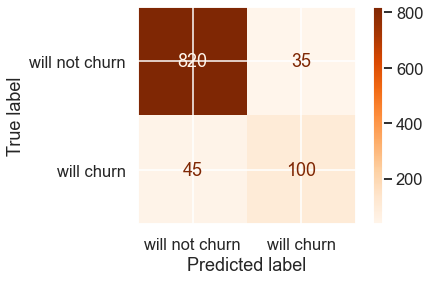

In [198]:
#plotting confusion matrix

plot_confusion_matrix(model_tree,
                      X_test,
                      y_test["Churn"],
                      display_labels = ["will not churn", "will churn"],
                      cmap = "Oranges")

plt.show()

In [199]:
#Perfrom cofusion matrix

confusion_matrix_ = confusion_matrix(y_test, 
                                     y_pred)

print('confusion_matrix: \n', confusion_matrix_)
print()
TN = confusion_matrix_ [0, 0]
print("True Negative = ",TN)

FP= confusion_matrix_ [0, 1]
print("False Positive = ",FP)

FN = confusion_matrix_ [1, 0]
print("False Negative = ",FN)

TP = confusion_matrix_ [1, 1]
print("True Positive = ",TP)

confusion_matrix: 
 [[820  35]
 [ 45 100]]

True Negative =  820
False Positive =  35
False Negative =  45
True Positive =  100


In [200]:

precision_ = np.round(precision_score(y_test,
                                      y_pred), 2)
recall_ = np.round(recall_score(y_test, 
                               y_pred), 2)

f1_score__ = np.round(f1_score(y_test, 
                               y_pred), 2)

print("Precision = ", precision_)
print("Recall = ", recall_)
print("f1_score = ", f1_score__)


Precision =  0.74
Recall =  0.69
f1_score =  0.71


In [201]:
TPR = np.round(TP/(TP+FN), 2)
FPR = np.round(FP/(FP+TN), 2)

print("True Positive Rate = ", TPR)
print("False Positive Rate = ", FPR)

True Positive Rate =  0.69
False Positive Rate =  0.04


Accuracy:  0.92
              precision    recall  f1-score   support

           0       0.95      0.96      0.95       855
           1       0.74      0.69      0.71       145

    accuracy                           0.92      1000
   macro avg       0.84      0.82      0.83      1000
weighted avg       0.92      0.92      0.92      1000



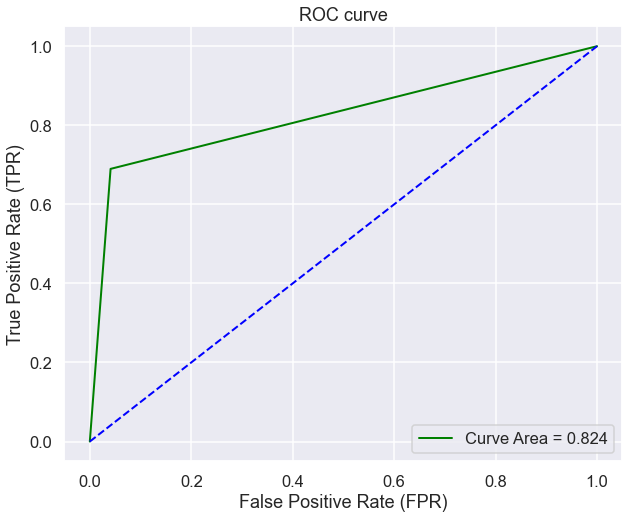

In [202]:
# roc,auc

print('Accuracy: ', accuracy_score(y_test, y_pred))

print(classification_report(y_test, y_pred))

fpr, tpr, thr = roc_curve(y_test, model_tree.predict_proba(X_test)[:,1])
auc = roc_auc_score(y_test, y_pred)
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='green', lw=2, label="Curve Area = %0.3f" % auc)
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

<h4 style="font-size: 18px;font-family:Times New Roman">Tree diagram of the Decision Tree</h4>

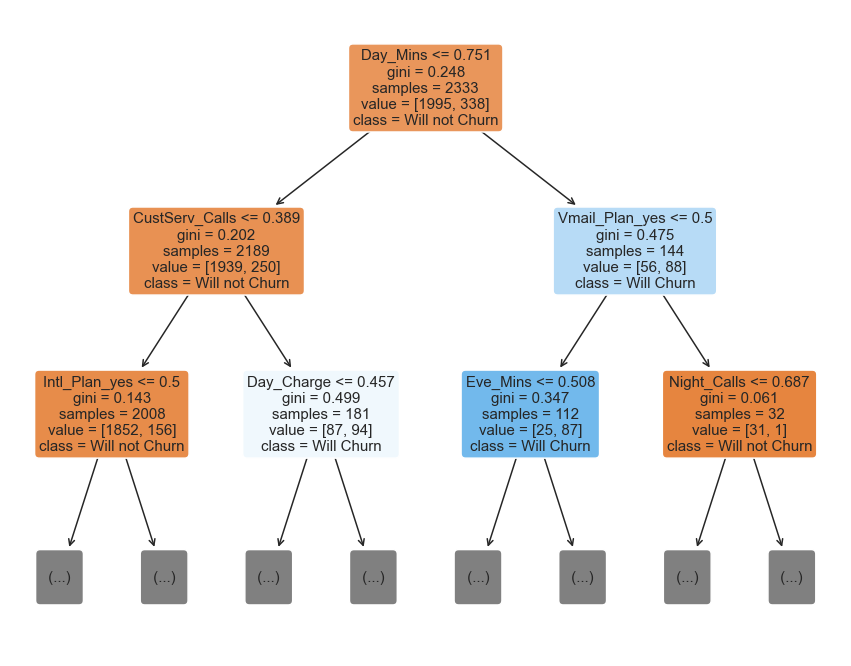

In [203]:
# Tree Plotting 

plt.figure(figsize = (15, 12))
plot_tree(model_tree, 
          filled=True,
          rounded=True,
          class_names = ["Will not Churn", "Will Churn"],
          feature_names = X.columns,
          max_depth=2, 
          fontsize=15)

plt.show()

<p style="font-size: 18px;font-family:Times New Roman">From upper decision tree we can decide that if a customer's "<b>Day_Mins</b>" is less or equal than 0.751 then two phenomena can happen, one of them is True and another is False. if <b>Day_Mins</b> is true and <b>CustServ_Calls</b> is less of equal than 0.389 then 1939 values is "will not churn" in terms of 2189 sample.The tree will run till the Node become pure node.</p>


<h4 style="font-size: 18px;font-family:Times New Roman">Perform Grid Search and Cross-Validation with Decision Tree Classifier</h4>

In [204]:
parameters = {'criterion': ['gini','entropy'],
              'max_depth': [3, 4, 5, 6, 7, None],
              'max_features': ["auto"]}

model = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(estimator=model,
                           param_grid=parameters,
                           scoring="recall",
                           cv=5,
                           n_jobs=-1)
grid_result = grid_search.fit(X_train, y_train)

In [205]:
y_pred = grid_result.predict(X_test)

In [206]:
cv_result = pd.DataFrame(grid_result.cv_results_)
cv_result = cv_result[['param_criterion', 'param_max_depth',
                       'split0_test_score',
                       'split1_test_score', 'split2_test_score', 'split3_test_score',
                       'split4_test_score', 'mean_test_score', 'std_test_score',
                       'rank_test_score']]
cv_result = cv_result.sort_values(by='rank_test_score')
display(cv_result)
print(cv_result.columns)

,param_criterion,param_max_depth,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
5,gini,None,0.617647,0.588235,0.676471,0.731343,0.567164,0.636172,0.060141,1
11,entropy,None,0.529412,0.529412,0.705882,0.626866,0.626866,0.603687,0.067160,2
10,entropy,7,0.441176,0.558824,0.588235,0.447761,0.597015,0.526602,0.068276,3
4,gini,7,0.382353,0.500000,0.514706,0.582090,0.417910,0.479412,0.071295,4
3,gini,6,0.367647,0.485294,0.514706,0.522388,0.402985,0.458604,0.062121,5
9,entropy,6,0.426471,0.323529,0.500000,0.447761,0.313433,0.402239,0.072524,6
2,gini,5,0.455882,0.338235,0.485294,0.388060,0.343284,0.402151,0.059244,7
8,entropy,5,0.426471,0.352941,0.470588,0.313433,0.373134,0.387313,0.055333,8
7,entropy,4,0.382353,0.220588,0.529412,0.432836,0.328358,0.378709,0.103142,9
1,gini,4,0.338235,0.220588,0.470588,0.343284,0.283582,0.331255,0.082616,10


Index(['param_criterion', 'param_max_depth', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'split4_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score'],
      dtype='object')


<h4 style="font-size: 18px;font-family:Times New Roman">Show the Confusion Matrix, Classification report, and ROC-AUC</h4>

<h4 style="font-size: 18px;font-family:Times New Roman">Confusion Matrix</h4>

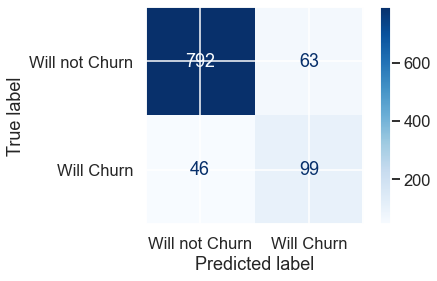

In [207]:
plot_confusion_matrix(grid_result, 
                      X_test, 
                      y_test, 
                      display_labels=["Will not Churn", "Will Churn"],
                      cmap='Blues')
plt.show()

<h4 style="font-size: 18px;font-family:Times New Roman">Classification report</h4>

In [208]:
confusion_matrix_dt = confusion_matrix(y_test, y_pred)
print('confusion_matrix: \n', confusion_matrix_dt)

print('Accuracy: ', accuracy_score(y_test, y_pred))

print(classification_report(y_test, y_pred))

confusion_matrix: 
 [[792  63]
 [ 46  99]]
Accuracy:  0.891
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       855
           1       0.61      0.68      0.64       145

    accuracy                           0.89      1000
   macro avg       0.78      0.80      0.79      1000
weighted avg       0.90      0.89      0.89      1000



<h4 style="font-size: 18px;font-family:Times New Roman">ROC-AUC<h4>

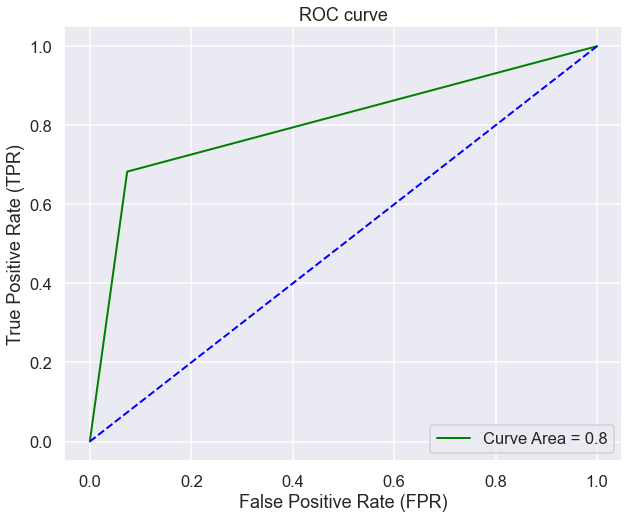

In [209]:
fpr, tpr, thr = roc_curve(y_test, grid_result.predict_proba(X_test)[:,1])
auc = np.round(roc_auc_score(y_test, y_pred), 2)

plt.figure(figsize=(10, 8))
plt.plot(fpr, 
         tpr, 
         color='green', 
         lw=2, 
         label="Curve Area = " +str(auc))

plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

<p style="font-size: 18px;font-family:Times New Roman">From upper noticed that after completing Cross-validation and Grid Search the rate of accuracy, recall, precision, and f1 score all of them is decreased. SO, performing cross-validation and grid search is not good for this model.</p>

<h4 style="font-size: 18px;font-family:Times New Roman">Explain accuracy, precision, recall, f1 score</h4>

<p style="font-size: 18px;font-family:Times New Roman"> <b>Accuracy</b>:accuracy is defined as the number of True Postives (TP) and True Negatives(TN) divided by the True Positives(TP), True Negatives (TN), False Positives(FP) and False Negatives(FN).<br>
accuracy = (TP+TN)/(TN+TP+FN+FP).
<br><br>
<b>Precision</b>: Precision is defined as the number of True Postives divided by True Positives(TP) and False Positives(FP).<br>
precision = (TP)/(TP+FP).
<br><br>
<b>Recall</b>:Recall is defined as the number of True Postives divided by True Positives(TP) and False Negatives(FN).<br>
Recall = TP/(TP+FN)
<br><br>
<b>F1 score</b>: F1 score is a way of combining the precision and recall of the model, and it is defined as the harmonic mean of the model’s precision and recall.<br>
F1 Score = 2*(Recall * Precision) / (Recall + Precision)
</p>